In [152]:
# Uploading libraries
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text


# Uploading dataset
df_2019_q1 = pd.read_csv('Original_data_Q1_2019_Q1_2020/Divvy_Trips_2019_Q1.csv')



In [153]:
df_2019_q1.head(20)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


In [154]:
df_2019_q1['usertype'].value_counts()

usertype
Subscriber    341906
Customer       23163
Name: count, dtype: int64

In [155]:
type(df_2019_q1['start_time'])

pandas.core.series.Series

In [156]:
# Formatted columns start_time & end_time from Series to date&time then created new column where calculated trip duration

df_2019_q1['start_time'] = pd.to_datetime(df_2019_q1['start_time'], format='%Y-%m-%d %H:%M:%S')
df_2019_q1['end_time'] = pd.to_datetime(df_2019_q1['end_time'], format='%Y-%m-%d %H:%M:%S')


df_2019_q1['ride_length_seconds'] = (df_2019_q1['end_time'] - df_2019_q1['start_time']).dt.total_seconds()

df_2019_q1['ride_length_seconds'] = df_2019_q1['ride_length_seconds'].astype(int)


def seconds_to_hhmmss(seconds):
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"


df_2019_q1['ride_length'] = df_2019_q1['ride_length_seconds'].apply(seconds_to_hhmmss)


df_2019_q1.sample(10)




,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length_seconds,ride_length
207297,21991550,2019-03-03 10:55:01,2019-03-03 11:01:04,2737,363.0,359,Larrabee St & Division St,331,Halsted St & Clybourn Ave (*),Subscriber,Female,1993.0,363,00:06:03
75361,21829469,2019-01-17 07:33:30,2019-01-17 07:40:32,3724,422.0,283,LaSalle St & Jackson Blvd,52,Michigan Ave & Lake St,Subscriber,Male,1992.0,422,00:07:02
75646,21829788,2019-01-17 07:56:55,2019-01-17 08:10:45,806,830.0,60,Dayton St & North Ave,112,Green St & Randolph St,Subscriber,Male,1986.0,830,00:13:50
163609,21939010,2019-02-19 16:09:49,2019-02-19 16:13:13,581,204.0,109,900 W Harrison St,32,Racine Ave & Congress Pkwy,Subscriber,Male,1990.0,204,00:03:24
69884,21823011,2019-01-16 07:50:40,2019-01-16 07:58:23,5165,463.0,44,State St & Randolph St,286,Franklin St & Quincy St,Subscriber,Male,1986.0,463,00:07:43
73450,21827339,2019-01-16 17:44:07,2019-01-16 17:47:54,2805,227.0,123,California Ave & Milwaukee Ave,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1983.0,227,00:03:47
97425,21856374,2019-01-25 00:44:38,2019-01-25 00:48:33,1933,235.0,198,Green St & Madison St,77,Clinton St & Madison St,Subscriber,Male,1994.0,235,00:03:55
325505,22132766,2019-03-26 07:08:43,2019-03-26 07:16:06,5463,443.0,337,Clark St & Chicago Ave,81,Daley Center Plaza,Subscriber,Female,1970.0,443,00:07:23
195037,21977060,2019-02-28 06:11:39,2019-02-28 06:14:57,3307,198.0,91,Clinton St & Washington Blvd,98,LaSalle St & Washington St,Subscriber,Male,1961.0,198,00:03:18
35458,21783114,2019-01-08 12:25:21,2019-01-08 12:51:27,3159,"1,566.0",33,State St & Van Buren St,15,Racine Ave & 18th St,Subscriber,Female,1989.0,1566,00:26:06


In [157]:
# Extract the day of the week and create a new column
df_2019_q1['day_of_week'] = df_2019_q1['start_time'].dt.day_name()

# Print the first few rows to verify
df_2019_q1.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length_seconds,ride_length,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,390,00:06:30,Tuesday
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,441,00:07:21,Tuesday
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,829,00:13:49,Tuesday
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,1783,00:29:43,Tuesday
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,364,00:06:04,Tuesday
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0,216,00:03:36,Tuesday
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0,177,00:02:57,Tuesday
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0,100,00:01:40,Tuesday
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0,1727,00:28:47,Tuesday
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0,336,00:05:36,Tuesday


In [158]:
df_2019_q1.dtypes

trip_id                         int64
start_time             datetime64[ns]
end_time               datetime64[ns]
bikeid                          int64
tripduration                   object
from_station_id                 int64
from_station_name              object
to_station_id                   int64
to_station_name                object
usertype                       object
gender                         object
birthyear                     float64
ride_length_seconds             int64
ride_length                    object
day_of_week                    object
dtype: object

In [162]:
df_2019_q1['birthyear'] = df_2019_q1['birthyear'].astype(int)
df_2019_q1 = df_2019_q1.drop('tripduration', axis=1)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [164]:
df_2019_q1

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length_seconds,ride_length,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,390,00:06:30,Tuesday
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,441,00:07:21,Tuesday
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,829,00:13:49,Tuesday
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,1783,00:29:43,Tuesday
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,364,00:06:04,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365064,22178524,2019-03-31 23:51:32,2019-04-01 00:04:09,1501,757.0,38,Clark St & Lake St,29,Noble St & Milwaukee Ave,Subscriber,Male,1993.0,757,00:12:37,Sunday
365065,22178525,2019-03-31 23:52:37,2019-03-31 23:58:09,3270,332.0,129,Blue Island Ave & 18th St,202,Halsted St & 18th St,Subscriber,Male,1992.0,332,00:05:32,Sunday
365066,22178526,2019-03-31 23:52:38,2019-04-01 00:06:44,3584,846.0,283,LaSalle St & Jackson Blvd,273,Michigan Ave & 18th St,Subscriber,Male,1984.0,846,00:14:06,Sunday
365067,22178527,2019-03-31 23:53:08,2019-03-31 23:56:06,4384,178.0,321,Wabash Ave & 9th St,39,Wabash Ave & Adams St,Subscriber,Male,1969.0,178,00:02:58,Sunday


In [166]:
df_2019_q1['usertype]'] = df_2019_q1['usertype'].replace('Subscriber', 'member')
df_2019_q1['usertype]'] = df_2019_q1['usertype'].replace('Customer', 'casual')



In [167]:
df_2019_q1['usertype'].value_counts()

usertype
Subscriber    341906
Customer       23163
Name: count, dtype: int64

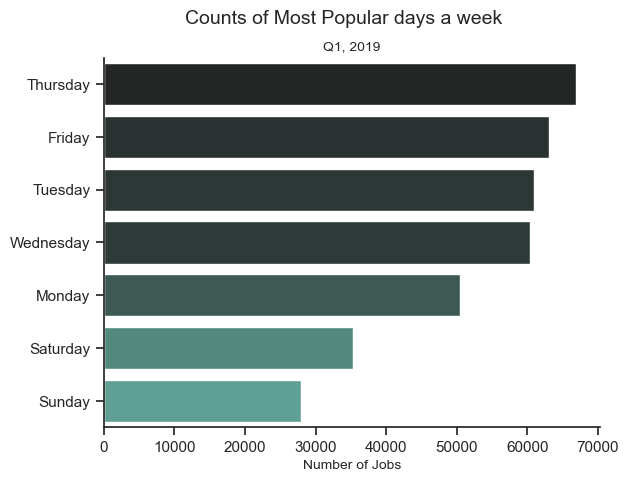

In [168]:
df_day_count = df_2019_q1['day_of_week'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_day_count, x='count', y='day_of_week', hue='count', palette='dark:#5A9_r', legend= False)
sns.despine()
plt.suptitle('Counts of Most Popular days a week', fontsize=14)
plt.title('Q1, 2019', fontsize=10)
plt.xlabel('Number of Jobs', fontsize=10)
plt.ylabel('')
plt.show()

In [169]:
df_2019_cust_days = df_2019_q1.groupby(['day_of_week', 'usertype']).size().reset_index(name='count')

In [170]:
pivoted_df = df_2019_cust_days.pivot(index='day_of_week', columns='usertype', values='count')


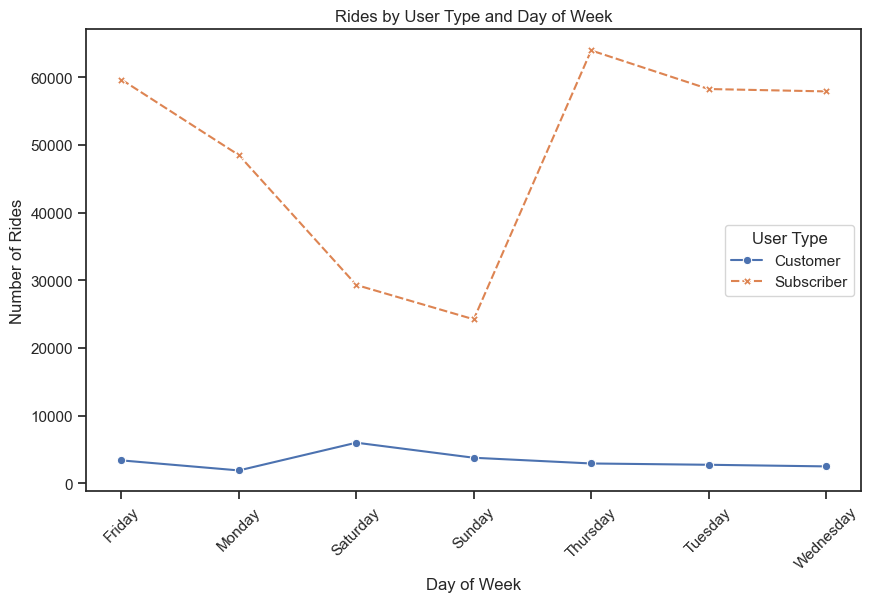

In [171]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivoted_df, markers=True)
plt.title('Rides by User Type and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()

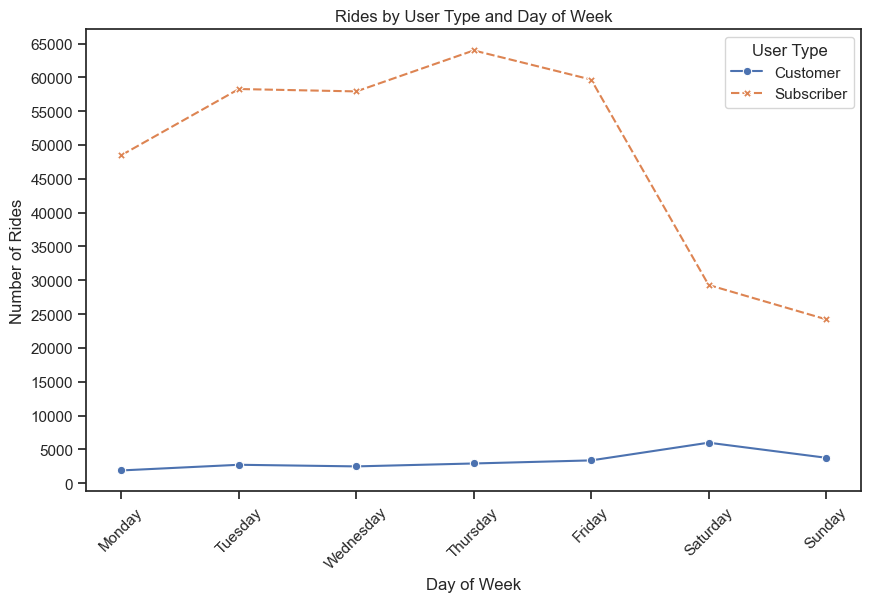

In [172]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivoted_df = pivoted_df.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.lineplot(data=pivoted_df, markers=True)
plt.title('Rides by User Type and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.yticks(range(0, 70000, 5000))
plt.legend(title='User Type')
plt.show()




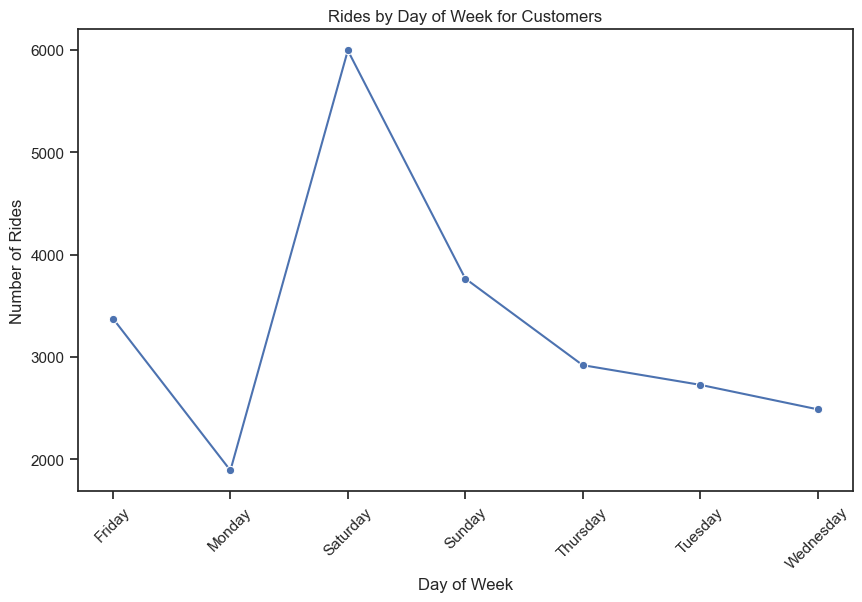

In [ ]:
# Filter the DataFrame for "Customer"
customer_df = df_2019_q1[df_2019_q1['usertype'] == 'Customer']
# Group the filtered data
grouped_customer_df = customer_df.groupby(['day_of_week']).size().reset_index(name='count')
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='count', data=grouped_customer_df, marker='o')
plt.title('Rides by Day of Week for Customers')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()